In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, roc_curve, auc
from sklearn import neighbors
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
#Reading the dataset
df=pd.read_csv("PCOS_data.csv")
df.head()

,Timestamp,1. Pick your age limit,2. Which work profile matches you?,3. What is your marital status?,4. How many kids do you have?,5. How would you describe your Body Physic?,6. Have you done any ultrasound scanning and what does your report say?,7. Do you notice any of these right before your period begins?,8. Are you experiencing irregular or late periods?,9. Are you experiencing painful periods?,...,16. Do you suffer from diabetes?,17. Do you suffer from hypothyroidism?,18. Do you experience excessive growth of facial and body hair?,19. Do you have acne/hyper-pigmentation?,20. Do you have the habit of consuming alcohol?,21. Do you have habit of smoking?,21. Are you under any stress?,22. Do you exercise regularly?,23. How would you describe your diet?,24. Are you diagnosed with PCOS/PCOD?
0,8/12/2022 14:50:10,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Constipation,No,Yes,...,No,No,No,No,No,No,No,Yes,Consist of packaged/processed food,I Don't know
1,8/12/2022 14:50:41,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,Yes,No,No,No,No,Consist of packaged/processed food,I Don't know
2,8/12/2022 14:56:46,19-34,Employed,Unmarried,0,I am a bit overweight,Normal results,Mood Swings,No,Yes,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
3,8/12/2022 14:57:19,19-34,Student,Unmarried,0,I am a bit overweight,No scanning was done,Constipation,Yes,Yes,...,No,No,No,Yes,No,No,Yes,No,Consist of packaged/processed food,I Don't know
4,8/12/2022 15:02:16,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,No,No,No,No,No,Consist of packaged/processed food,I Don't know


In [3]:
df.head()

,Timestamp,1. Pick your age limit,2. Which work profile matches you?,3. What is your marital status?,4. How many kids do you have?,5. How would you describe your Body Physic?,6. Have you done any ultrasound scanning and what does your report say?,7. Do you notice any of these right before your period begins?,8. Are you experiencing irregular or late periods?,9. Are you experiencing painful periods?,...,16. Do you suffer from diabetes?,17. Do you suffer from hypothyroidism?,18. Do you experience excessive growth of facial and body hair?,19. Do you have acne/hyper-pigmentation?,20. Do you have the habit of consuming alcohol?,21. Do you have habit of smoking?,21. Are you under any stress?,22. Do you exercise regularly?,23. How would you describe your diet?,24. Are you diagnosed with PCOS/PCOD?
0,8/12/2022 14:50:10,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Constipation,No,Yes,...,No,No,No,No,No,No,No,Yes,Consist of packaged/processed food,I Don't know
1,8/12/2022 14:50:41,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,Yes,No,No,No,No,Consist of packaged/processed food,I Don't know
2,8/12/2022 14:56:46,19-34,Employed,Unmarried,0,I am a bit overweight,Normal results,Mood Swings,No,Yes,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
3,8/12/2022 14:57:19,19-34,Student,Unmarried,0,I am a bit overweight,No scanning was done,Constipation,Yes,Yes,...,No,No,No,Yes,No,No,Yes,No,Consist of packaged/processed food,I Don't know
4,8/12/2022 15:02:16,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,No,No,No,No,No,Consist of packaged/processed food,I Don't know


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 26 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Timestamp                                                                166 non-null    object
 1   1. Pick your age limit                                                   166 non-null    object
 2   2. Which work profile matches you?                                       166 non-null    object
 3   3. What is your marital status?                                          166 non-null    object
 4   4. How many kids do you have?                                            166 non-null    object
 5   5. How would you describe your Body Physic?                              166 non-null    object
 6   6. Have you done any ultrasound scanning and what does your report say?  166 non-n

In [5]:
renamed={'1. Pick your age limit': 'age limit', 
                       '2. Which work profile matches you?': 'Profession', 
                       '3. What is your marital status?':'marital status', 
                       '4. How many kids do you have?':'no of kids', 
                       '5. How would you describe your Body Physic?':'body type', 
                       '6. Have you done any ultrasound scanning and what does your report say?':'ultrasound status', 
                       '7. Do you notice any of these right before your period begins?':'PMS', 
                       '8. Are you experiencing irregular or late periods?':'regular periods', 
                       '9. Are you experiencing painful periods?':'painful periods', 
                       '10. Are you experiencing excessive bleeding?':'excessive bleeding',
                       '11. How often do you get your periods?':'period cycle',
                       '12. How long does your period last?':'period length',
                       '13. How would you like to rate your period pains?':'period pain scale',
                       '14. Do you notice any clots during your periods?':'period clots',
                       '15. Is/was your mother diagnosed with PCOS/PCOD? ':'genetic PCOS',
                       '16. Do you suffer from diabetes?':'diabetes',
                       '17. Do you suffer from hypothyroidism?':'hypothyroid',
                       '18. Do you experience excessive growth of facial and body hair?':'excessive hair growth',
                       '19. Do you have acne/hyper-pigmentation?':'acne',
                       '20. Do you have the habit of consuming alcohol?':'alcohol habit',
                       '21. Do you have habit of smoking?': 'smoking habit',
                       '21. Are you under any stress?':'stress',
                       '22. Do you exercise regularly?':'regular excercise',
                       '23. How would you describe your diet?':'diet',
                       '24. Are you diagnosed with PCOS/PCOD?':'diagnosis',
                       }

In [6]:
df.rename(renamed, axis='columns', inplace=True)
df.head()

,Timestamp,age limit,Profession,marital status,no of kids,body type,ultrasound status,PMS,regular periods,painful periods,...,diabetes,hypothyroid,excessive hair growth,acne,alcohol habit,smoking habit,stress,regular excercise,diet,diagnosis
0,8/12/2022 14:50:10,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Constipation,No,Yes,...,No,No,No,No,No,No,No,Yes,Consist of packaged/processed food,I Don't know
1,8/12/2022 14:50:41,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,Yes,No,No,No,No,Consist of packaged/processed food,I Don't know
2,8/12/2022 14:56:46,19-34,Employed,Unmarried,0,I am a bit overweight,Normal results,Mood Swings,No,Yes,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
3,8/12/2022 14:57:19,19-34,Student,Unmarried,0,I am a bit overweight,No scanning was done,Constipation,Yes,Yes,...,No,No,No,Yes,No,No,Yes,No,Consist of packaged/processed food,I Don't know
4,8/12/2022 15:02:16,19-34,Student,Unmarried,0,I am at a healthy weight,No scanning was done,Mood Swings,No,No,...,No,No,No,No,No,No,No,No,Consist of packaged/processed food,I Don't know


In [7]:
df.shape

(166, 26)

In [8]:
df=df.drop(['Timestamp','ultrasound status'],axis=1)
df.shape

(166, 24)

In [9]:
df.head(10)

,age limit,Profession,marital status,no of kids,body type,PMS,regular periods,painful periods,excessive bleeding,period cycle,...,diabetes,hypothyroid,excessive hair growth,acne,alcohol habit,smoking habit,stress,regular excercise,diet,diagnosis
0,19-34,Student,Unmarried,0,I am at a healthy weight,Constipation,No,Yes,No,21 - 40 days,...,No,No,No,No,No,No,No,Yes,Consist of packaged/processed food,I Don't know
1,19-34,Student,Unmarried,0,I am at a healthy weight,Mood Swings,No,No,No,21 - 40 days,...,No,No,No,Yes,No,No,No,No,Consist of packaged/processed food,I Don't know
2,19-34,Employed,Unmarried,0,I am a bit overweight,Mood Swings,No,Yes,No,21 - 40 days,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
3,19-34,Student,Unmarried,0,I am a bit overweight,Constipation,Yes,Yes,Yes,Less than 21 days,...,No,No,No,Yes,No,No,Yes,No,Consist of packaged/processed food,I Don't know
4,19-34,Student,Unmarried,0,I am at a healthy weight,Mood Swings,No,No,Yes,Less than 21 days,...,No,No,No,No,No,No,No,No,Consist of packaged/processed food,I Don't know
5,19-34,Student,Unmarried,0,I am a bit overweight,None,No,No,No,21 - 40 days,...,No,No,No,Yes,No,No,No,Yes,Consist of high fiber and balance between carb...,No
6,35 - 50,Unemployed,Unmarried,2,I am at a healthy weight,None,No,Yes,No,21 - 40 days,...,No,No,No,Yes,No,No,No,No,Consist of high fiber and balance between carb...,I Don't know
7,19-34,Employed,Unmarried,0,I am at a healthy weight,Mood Swings,No,No,No,21 - 40 days,...,No,No,No,No,No,No,Yes,No,Consist of high fiber and balance between carb...,No
8,19-34,Student,Unmarried,0,I am at a healthy weight,None,Yes,No,No,More than 40 days,...,No,No,Yes,Yes,No,No,Yes,Yes,Consist of packaged/processed food,Yes
9,19-34,Unemployed,Married,2,I am at a healthy weight,None,No,No,Yes,21 - 40 days,...,No,No,No,No,No,No,No,No,Consist of high fiber and balance between carb...,No


In [10]:
#Checking missing values
df.isna().sum()

age limit                0
Profession               0
marital status           0
no of kids               0
body type                0
PMS                      0
regular periods          0
painful periods          0
excessive bleeding       0
period cycle             0
period length            0
period pain scale        0
period clots             0
genetic PCOS             0
diabetes                 0
hypothyroid              0
excessive hair growth    0
acne                     0
alcohol habit            0
smoking habit            0
stress                   0
regular excercise        0
diet                     0
diagnosis                0
dtype: int64

In [11]:
df2=df1=df

In [12]:
df1=df1[df1['diagnosis'] == 'I Don\'t know']
#Dropping diagnosis column of predictive dataset as it contains only 'I Don't know'
df1=df1.drop(['diagnosis'],axis=1)
df1.shape

(40, 23)

In [13]:
#Data for modeling
df2.drop(df2[df2['diagnosis'] == 'I Don\'t know'].index, inplace = True)
df2.shape

(126, 24)

In [14]:
df.to_excel(r'C:\Users\Dell\Desktop\project\datacleaned.xlsx')

In [15]:
# list of numerical variables
numerical = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical))

print(numerical)

Number of numerical variables:  0
[]


In [16]:
#list of categorical variables
categorical=[]
for col in df.select_dtypes(include='object').columns:
    categorical.append(col)
print('Number of categorical variables: ', len(categorical))
print(categorical)

Number of categorical variables:  24
['age limit', 'Profession', 'marital status', 'no of kids', 'body type', 'PMS', 'regular periods', 'painful periods', 'excessive bleeding', 'period cycle', 'period length', 'period pain scale', 'period clots', 'genetic PCOS', 'diabetes', 'hypothyroid', 'excessive hair growth', 'acne', 'alcohol habit', 'smoking habit', 'stress', 'regular excercise', 'diet', 'diagnosis']


In [17]:
#Label Encoding for categorical variables in df1
from sklearn import preprocessing
for i in range(0,(len(categorical)-1)):
    le=preprocessing.LabelEncoder()
    le.fit(df1[categorical[i]])
    df1[categorical[i]]=le.transform(df1[categorical[i]])

In [18]:
#Label Encoding for categorical variables in df2
from sklearn import preprocessing
for i in range(0,len(categorical)):
    le=preprocessing.LabelEncoder()
    le.fit(df2[categorical[i]])
    df2[categorical[i]]=le.transform(df2[categorical[i]])

In [19]:
y=df2["diagnosis"]
X=df2.drop(['diagnosis'],axis=1)
print('The dependent variable is diagnosis and the independent variables are ',list(X.columns))

The dependent variable is diagnosis and the independent variables are  ['age limit', 'Profession', 'marital status', 'no of kids', 'body type', 'PMS', 'regular periods', 'painful periods', 'excessive bleeding', 'period cycle', 'period length', 'period pain scale', 'period clots', 'genetic PCOS', 'diabetes', 'hypothyroid', 'excessive hair growth', 'acne', 'alcohol habit', 'smoking habit', 'stress', 'regular excercise', 'diet']


In [20]:
df2.head(10)

,age limit,Profession,marital status,no of kids,body type,PMS,regular periods,painful periods,excessive bleeding,period cycle,...,diabetes,hypothyroid,excessive hair growth,acne,alcohol habit,smoking habit,stress,regular excercise,diet,diagnosis
2,0,0,1,0,1,5,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,1,1,0,1,6,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,0,0,1,0,2,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,1,0,2,6,1,0,0,2,...,0,0,1,1,0,0,1,1,1,1
9,0,2,0,2,2,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,2,0,2,2,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,0,1,1,0,1,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,1,1,0,2,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,1,1,0,2,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df2.shape

(126, 24)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 2 to 165
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age limit              126 non-null    int32
 1   Profession             126 non-null    int32
 2   marital status         126 non-null    int32
 3   no of kids             126 non-null    int32
 4   body type              126 non-null    int32
 5   PMS                    126 non-null    int32
 6   regular periods        126 non-null    int32
 7   painful periods        126 non-null    int32
 8   excessive bleeding     126 non-null    int32
 9   period cycle           126 non-null    int32
 10  period length          126 non-null    int32
 11  period pain scale      126 non-null    int32
 12  period clots           126 non-null    int32
 13  genetic PCOS           126 non-null    int32
 14  diabetes               126 non-null    int32
 15  hypothyroid            126 non-null    i

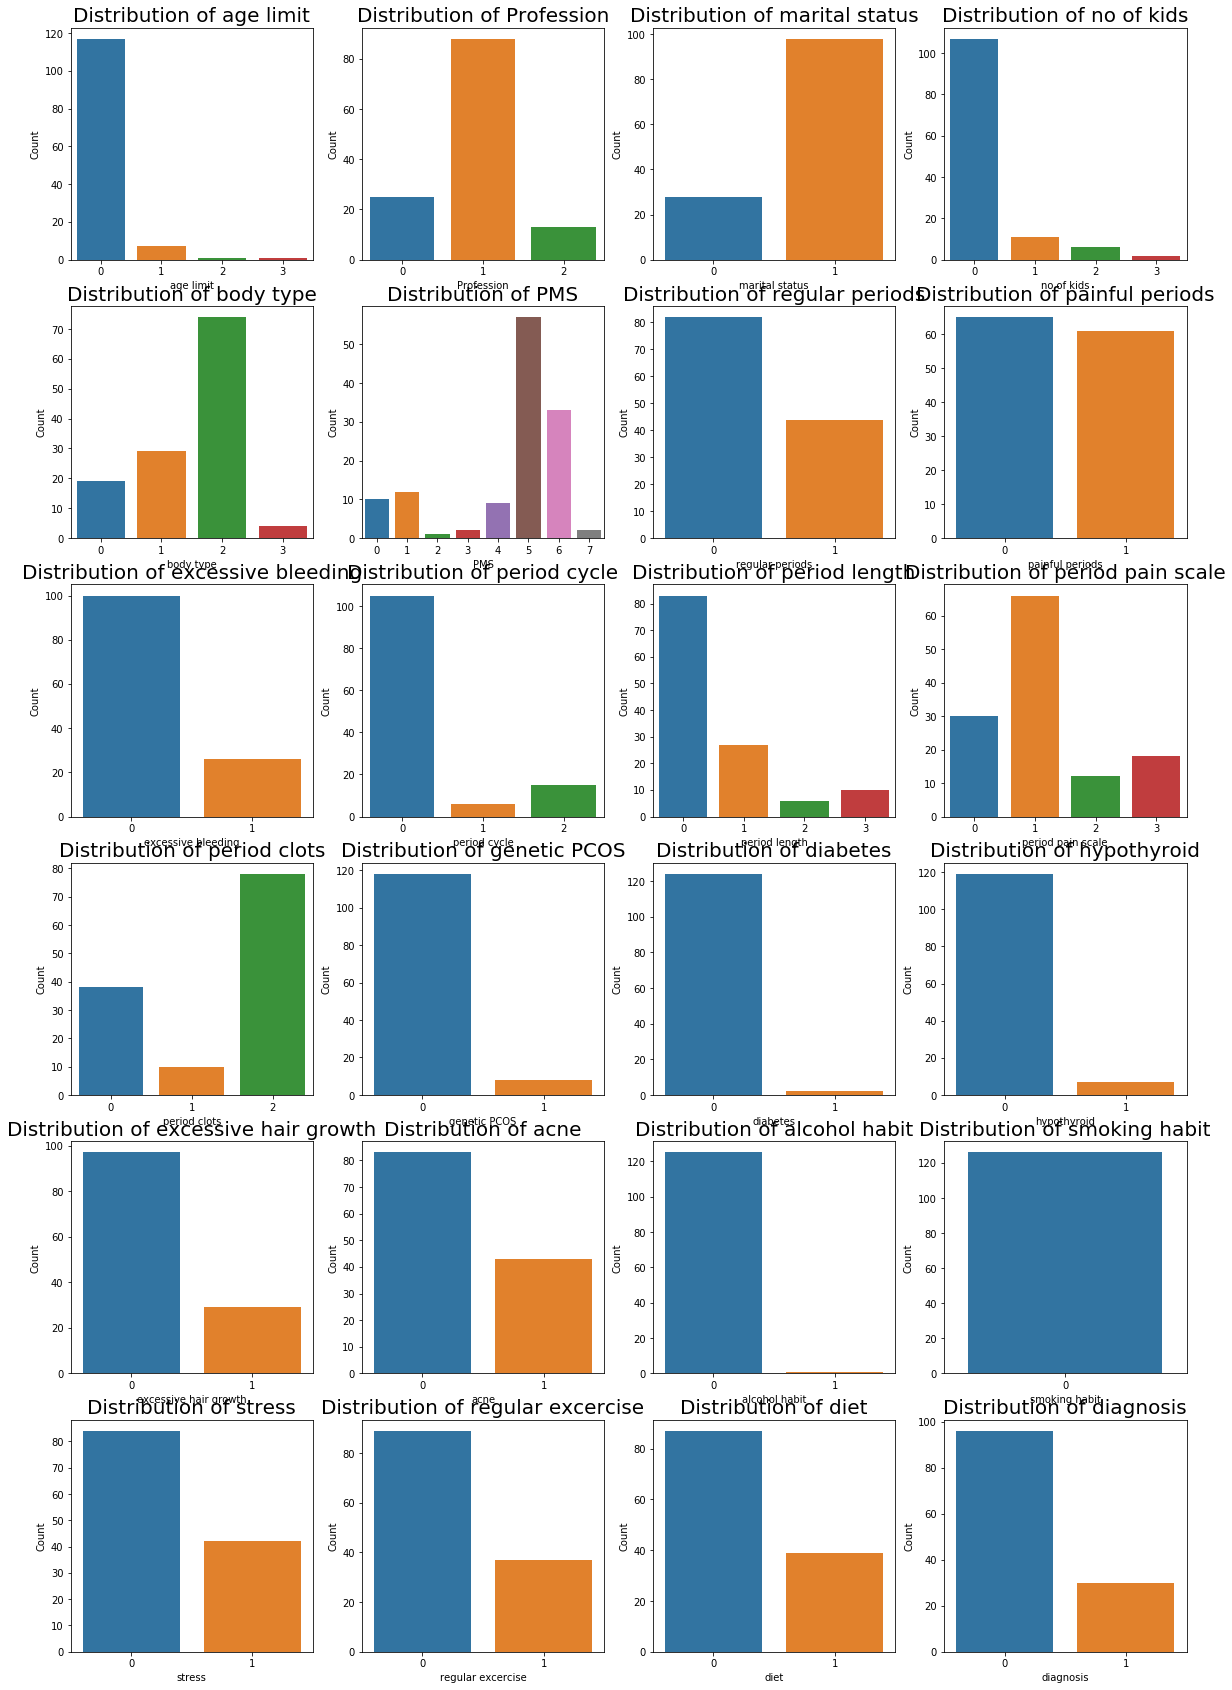

In [23]:
import warnings
warnings.filterwarnings('ignore')
col=list(df2.columns)
plt.rcParams['figure.figsize'] = (20, 35)
plotnumber =1
for i in range (0,len(col)):
    plt.subplot(7, 4, plotnumber)
    sns.countplot(df2[col[i]])
    str='Distribution of '+col[i]
    plt.title(str, fontsize = 20)
    plt.xlabel(col[i])
    plt.ylabel('Count')
    plotnumber+=1

Text(0.5, 1, 'Heat Map')

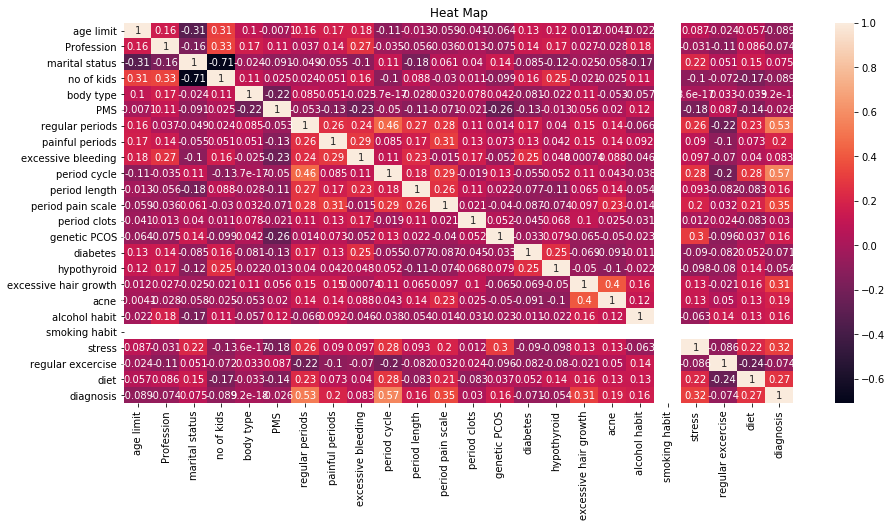

In [24]:
## Checking for correlation
import matplotlib.pyplot as plt
import seaborn as sns
cor_mat=df2.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.title('Heat Map')

In [25]:
cor=df2.corr()
cor_target = abs(cor['diagnosis'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print('There are ',(len(relevant_features)-1),'relevant features out of which diagnosis is the target variable')
relevant_features[0:(len(relevant_features)-1)]

There are  5 relevant features out of which diagnosis is the target variable


regular periods          0.528616
period cycle             0.572458
period pain scale        0.351006
excessive hair growth    0.314092
stress                   0.316228
Name: diagnosis, dtype: float64

In [26]:
relevant_features=['regular periods ','painful periods','period_cycle','period pain scale','excessive hair growth','stress']
print(relevant_features)

['regular periods ', 'painful periods', 'period_cycle', 'period pain scale', 'excessive hair growth', 'stress']


In [27]:
relevant_features_df = df2[['regular periods','painful periods','period cycle','period pain scale','excessive hair growth','stress']].copy()

In [28]:
X_train,X_test,y_train,y_test=train_test_split(relevant_features_df,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape

(100, 6)

In [30]:
X_test.shape

(26, 6)

In [31]:
#Logistic Regression
clf=LogisticRegression()
model=clf.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
b=np.round(ac*100,2)
print('Accuracy is ',b,'%')

Accuracy is  80.77 %


Score in Test Data : 0.8076923076923077
Right classification : 21
Wrong classification : 5


<Figure size 360x360 with 0 Axes>

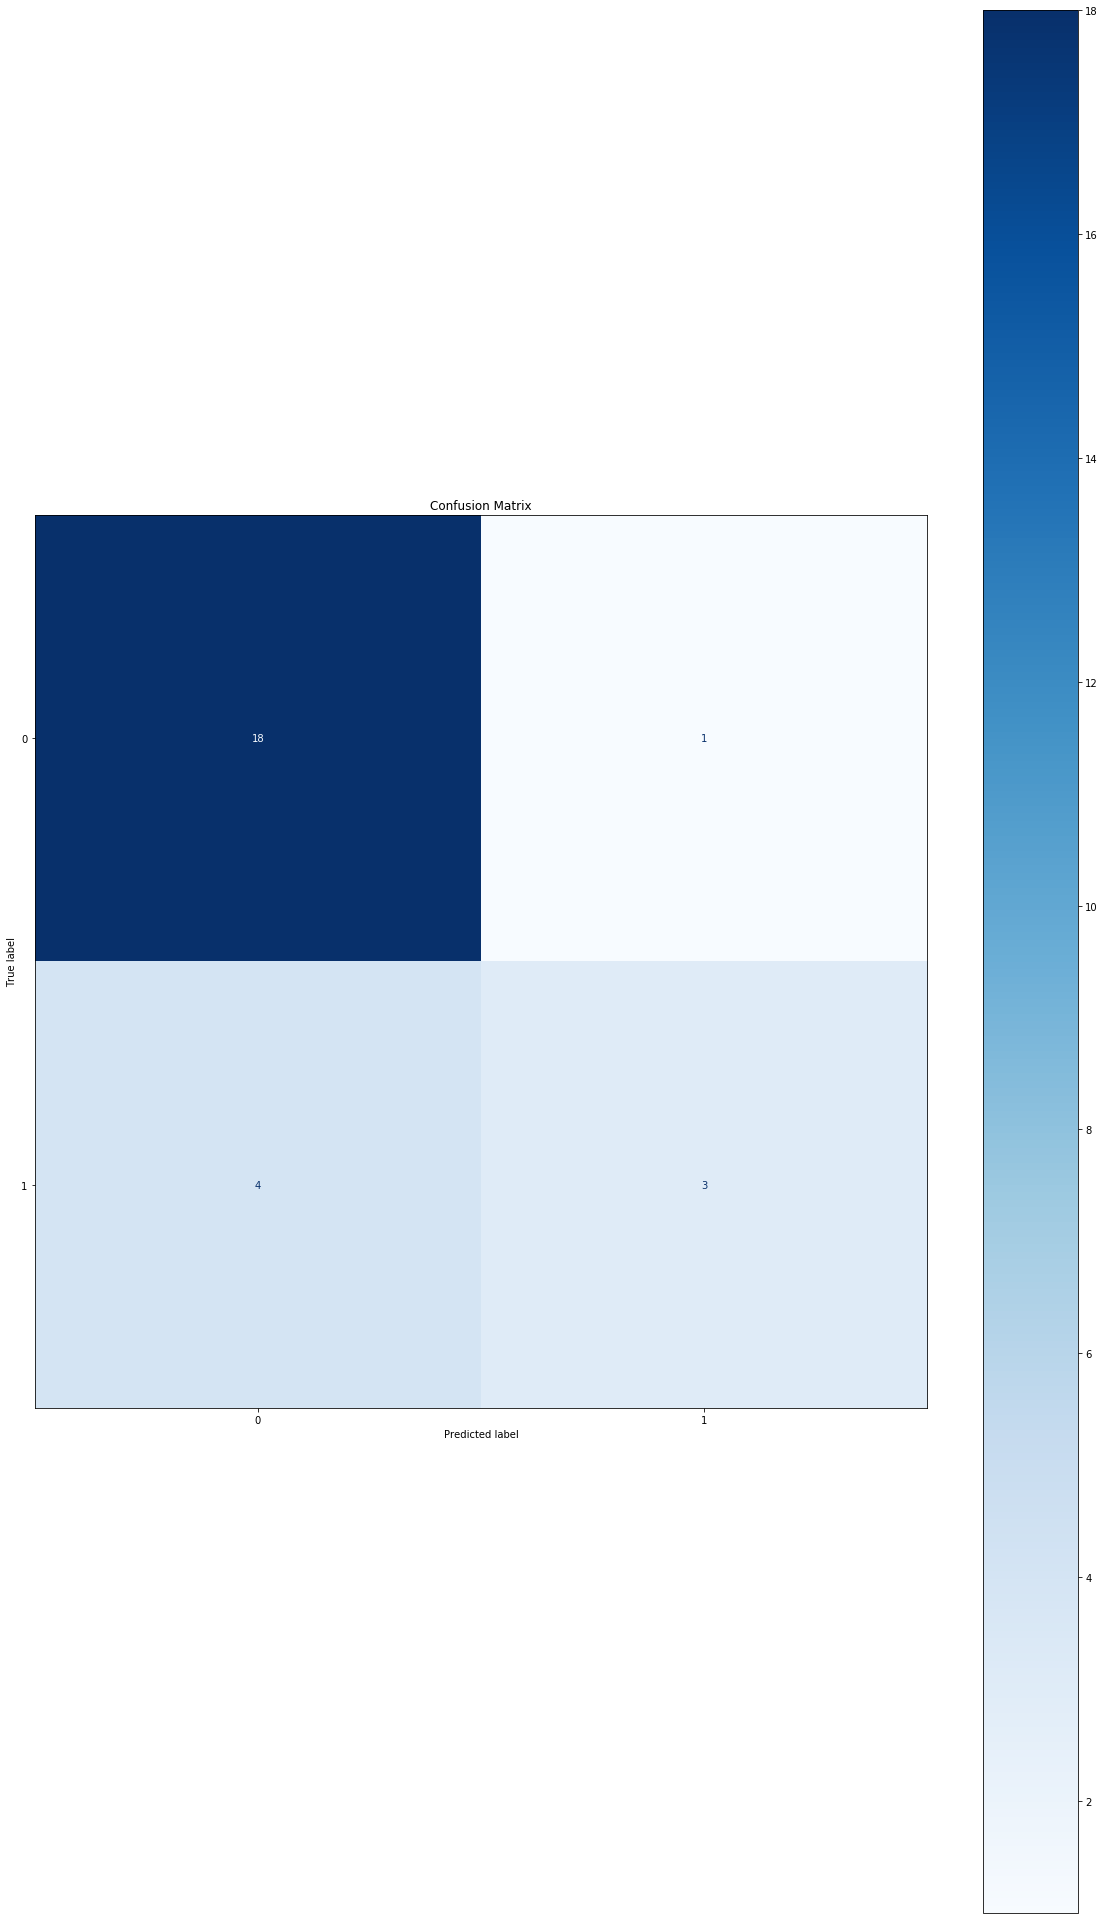

In [32]:
#Model Evaluation of logistic Regression
plt.figure(figsize=(5,5))
print(f"Score in Test Data : {model.score(X_test,y_test)}")
#plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
#plt.figure(figsize=(5,5))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

In [33]:
X2=df1[['regular periods','painful periods','period cycle','period pain scale','excessive hair growth','stress']].copy()
print('The independent variables are ',list(X2.columns))
X2.shape

The independent variables are  ['regular periods', 'painful periods', 'period cycle', 'period pain scale', 'excessive hair growth', 'stress']


(40, 6)

In [34]:
clf=LogisticRegression()
model=clf.fit(relevant_features_df,y)
y_pred=model.predict(X2)

In [35]:
df3=X2
df4=pd.DataFrame(y_pred)
pred_diag={0:'diagnosis'}
df4.rename(pred_diag, axis=1, inplace=True)
df4.head(10)

,diagnosis
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [36]:
df4['diagnosis'].value_counts()

0    31
1     9
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Barplot for predicted diagnosis using Logistic Regression')

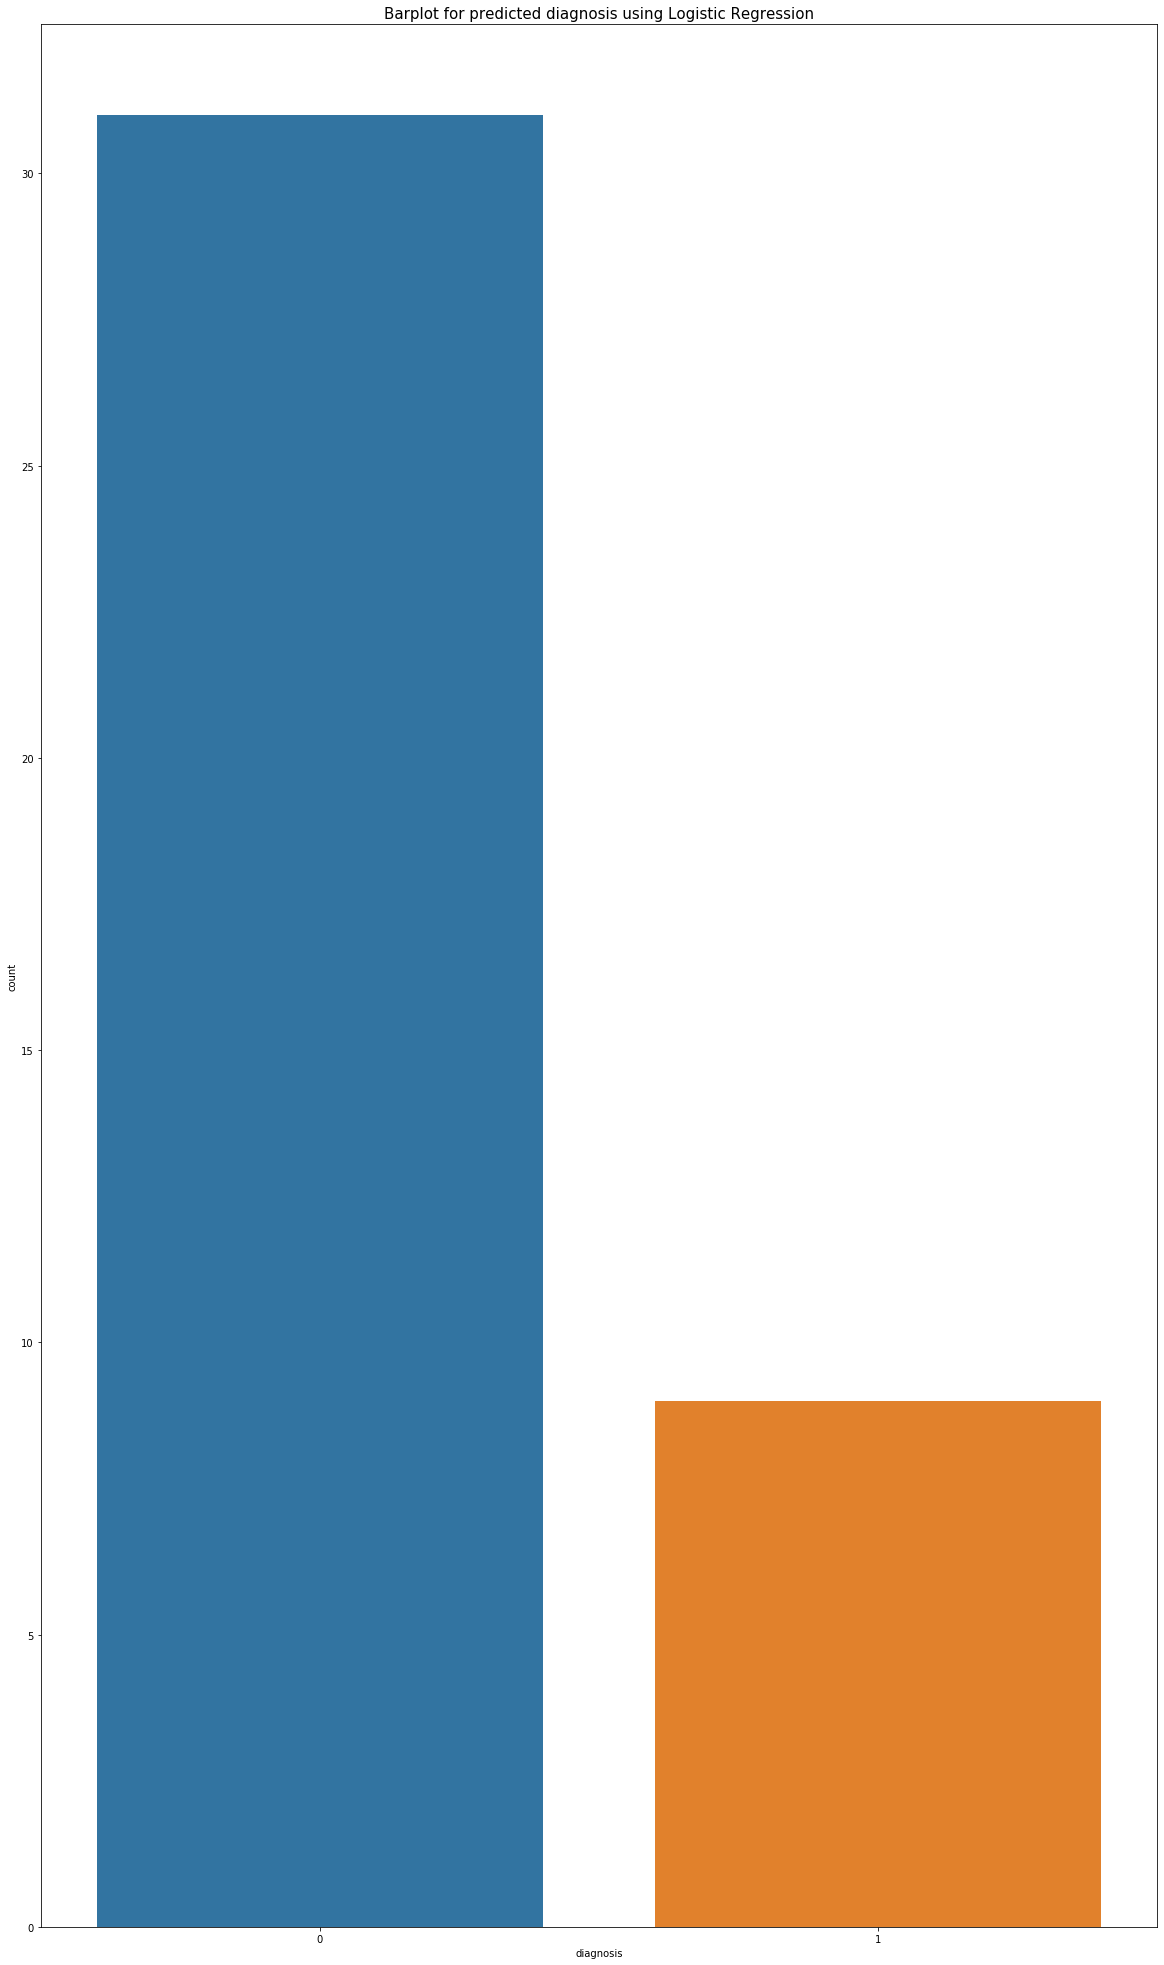

In [37]:
sns.countplot(df4['diagnosis'])
plt.title('Barplot for predicted diagnosis using Logistic Regression', fontsize = 15)

In [38]:
df5=pd.concat([df3,df4],axis=1)
df5=df5.dropna()

df5.head(15)

,regular periods,painful periods,period cycle,period pain scale,excessive hair growth,stress,diagnosis
0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,3.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11,1.0,1.0,1.0,1.0,0.0,0.0,0.0
21,0.0,1.0,0.0,3.0,0.0,0.0,0.0
24,0.0,0.0,0.0,3.0,0.0,0.0,0.0
25,1.0,1.0,1.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [39]:
df5.shape

(14, 7)

In [40]:
relevant_training_data = df2[['regular periods','painful periods','period cycle','period pain scale','excessive hair growth','stress','diagnosis']].copy()

In [41]:
relevant_training_data.shape

(126, 7)

In [42]:
df5=df5.astype('int')

In [43]:
df5.dtypes

regular periods          int32
painful periods          int32
period cycle             int32
period pain scale        int32
excessive hair growth    int32
stress                   int32
diagnosis                int32
dtype: object

In [44]:
df_final=pd.concat([relevant_training_data,df5],axis=0)
df_final=df_final.dropna()
df_final.head(15)

,regular periods,painful periods,period cycle,period pain scale,excessive hair growth,stress,diagnosis
2,0,1,0,1,0,0,0
5,0,0,0,2,0,0,0
7,0,0,0,1,0,1,0
8,1,0,2,2,1,1,1
9,0,0,0,0,0,0,0
10,0,1,0,1,0,0,0
12,0,0,0,1,0,0,0
13,0,1,0,1,0,0,0
14,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0


In [45]:
df_final.shape

(140, 7)

In [46]:
y_re=df_final["diagnosis"]
X_re=df_final.drop(['diagnosis'],axis=1)
print('The dependent variable is diagnosis and the independent variables are ',list(X_re.columns))
print(X_re.shape)
print(y_re.shape)

The dependent variable is diagnosis and the independent variables are  ['regular periods', 'painful periods', 'period cycle', 'period pain scale', 'excessive hair growth', 'stress']
(140, 6)
(140,)


In [47]:
df_final.dtypes

regular periods          int32
painful periods          int32
period cycle             int32
period pain scale        int32
excessive hair growth    int32
stress                   int32
diagnosis                int32
dtype: object

In [48]:
X_re_train,X_re_test,y_re_train,y_re_test=train_test_split(X_re,y_re,test_size=0.2,random_state=0)

In [49]:
#Logistic Regression
clf_re=LogisticRegression()
model_re=clf_re.fit(X_re_train,y_re_train)
y_re_pred=model_re.predict(X_re_test)
ac=accuracy_score(y_re_test,y_re_pred,normalize=True)
b=np.round(ac*100,2)
print('Accuracy is ',b,'%')

Accuracy is  89.29 %


In [50]:
import pickle
pickle.dump(model_re, open('model_re.pkl', 'wb'))

In [51]:
pikled_model_re=pickle.load(open('model_re.pkl','rb'))

In [52]:
pikled_model_re.predict(X_re_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [53]:
df5.dtypes

regular periods          int32
painful periods          int32
period cycle             int32
period pain scale        int32
excessive hair growth    int32
stress                   int32
diagnosis                int32
dtype: object

In [54]:
relevant_training_data.dtypes

regular periods          int32
painful periods          int32
period cycle             int32
period pain scale        int32
excessive hair growth    int32
stress                   int32
diagnosis                int32
dtype: object

In [55]:
import numpy as np

In [56]:
features=np.array([[1,0,2,2,1,1]])
pikled_model_re.predict(features)

array([1])

In [57]:
features=np.array([[0,1,0,1,0,0]])
pikled_model_re.predict(features)

array([0])

In [ ]:
list1=[]
rp=int(input("Are you experiencing irregular or late periods?:'regular periods': {'No': 0, 'Yes': 1} "))
list1.append(rp)
pp=int(input(" Are you experiencing painful periods?:'painful periods': {'No': 0, 'Yes': 1} "))
list1.append(pp)
pc=int(input("How often do you get your periods?:'period cycle': {'21 - 40 days': 0, 'Less than 21 days': 1, 'More than 40 days': 2} "))
list1.append(pc)
pps=int(input("How would you like to rate your period pains?:'period pain scale': {'Mild': 0, 'Moderate': 1, 'No period pain': 2, 'Severe': 3} "))
list1.append(pps)
ehg=int(input("Do you experience excessive growth of facial and body hair?:'excessive hair growth': {'No': 0, 'Yes': 1} "))
list1.append(ehg)
s=int(input(" Are you under any stress?:'stress': {'No': 0, 'Yes': 1} "))
list1.append(s)
print(list1)

In [ ]:
feature1=np.array([list1])
#print(feature1)
pikled_model_re.predict(feature1)


In [ ]:
if(pikled_model_re.predict(feature1)==0):
    print("NON-PCOS")
else:
    print("PCOS")